<a href="https://colab.research.google.com/github/niou12/ConsMedInt/blob/main/DiagnosticMedicalIntelligent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importation de toutes les librairies necessaires
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tkinter import *
import numpy as np
import pandas as pd
import os

ceci est un projet de consultaion medicale intelligent pour faire un diagnostic de la santé d'un patient. On prend ici l'ophtalmologie qui est la maladie de l'oeil.

In [ ]:
#liste des symptomes de la maladie de l'oeil (l1)
l1 = ['Vision floue','Éblouissement','Vision nocturne réduite','Vision en double','Vision centrale dégradée',
      'Distorsion des lignes droites','Tâche sombre dans le champ visuel','vision périphérique réduite',
      'Maux de tête','Douleur oculaire','Sensibilité à la lumière','Sécrétion oculaire']


In [ ]:
#liste des catégories de la maladie ophtalmologie
maladie=['cataracte','dmla','glaucome','keratite']

#maladie = [df['prediction'].unique()]
#print(maladie)


In [ ]:
l2=[]
for i in range(0,len(l1)):
    l2.append(0)
print(l2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
#IMPORTER MES DONNEES DEPUIS DRIVE
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#CONVERTIR LE FICHIER .CSV POUR UN ENCODAGE EN UTF8

import codecs

# Chemin du fichier CSV d'origine et du fichier de sortie UTF-8
chemin_entree = "/content/drive/MyDrive/Colab Notebooks/prototp.csv"
chemin_sortie = "/content/drive/MyDrive/Colab Notebooks/prototp_utf8.csv"

# Ouvrir le fichier d'entrée avec l'encodage d'origine
with codecs.open(chemin_entree, 'r', encoding='ISO-8859-1') as file:
    contenu = file.read()

# Écrire le contenu dans un nouveau fichier avec l'encodage UTF-8
with codecs.open(chemin_sortie, 'w', encoding='utf-8') as file:
    file.write(contenu)


In [ ]:
#IMPORTER UN FICHIER XL CONTENANT LA LISTE DES SYMPTOMES GROUPES PAR MALADIE CORRESPONDANTE
#grouper les symptomes par maladie


df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/prototp.csv")
DF=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/prototp_utf8.csv', index_col='prediction')

#REMPLACER LES VALEURS DU FICHIER IMPORTE PAR PANDAS EN UTILISANT SES FONCTIONS
df.replace({'prediction':{'Vision floue':0,'Éblouissement':1,'Vision nocturne réduite':2,'Vision en double':3
                          ,'Vision centrale dégradée':4,'Distorsion des lignes droites':5,
                          'Tâche sombre dans le champ visuel':6,'vision périphérique réduite':7,
                          'Maux de tête':8,'Douleur oculaire':9,'Sensibilité à la lumière':10,
                          'Sécrétion oculaire':11}},inplace=True)
DF.head()

,vision_floue,eblouissement,vision_nocturne_reduite,vision_en_double,vision_centrale_degradee,distorsion_ligne_droite,tache_sombre,vision_preipherique_reduite,maux_de_tete,douleur_oculaire,secretion_oculaire,sensible_lumiere
prediction,,,,,,,,,,,,
1,1,1,1,0,0,0,0,0,0,0,0,cataracte
1,1,1,0,0,0,0,0,0,0,0,0,cataracte
1,1,0,1,0,0,0,0,0,0,0,0,cataracte
1,0,1,1,0,0,0,0,0,0,0,0,cataracte
0,1,1,1,0,0,0,0,0,0,0,0,cataracte


In [ ]:
#REPRESENTER LES DONNEES PAR DES GRAPHES
def plotPerColumnDistribution(df1, nGraphShown, nGraphPerRow):
    nunique = df1.nunique()
    # Correction de la faute de frappe ici : nunique au lieu de nuninque
    df1 = df1[[col for col in df1 if nunique[col] > 1 and nunique[col] < 50]]
    nRow, nCol = df1.shape
    columnNames = list(df1.columns)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')

    for i in range(min(nGraphShown, nCol)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df1.iloc[:, i]

        if not np.issubdtype(type(columnDf.iloc[0]), np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()

        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')

    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

In [ ]:
###scatter and density plots
def plotScatterMatrix(df1, plotSize, textSize) :
	df1 = df1.select_dtypes(include = [np.number])   ##ne garder que les colonnes avec des nombres

	##supprimer les lignes ainsi que les colonnes qui conduiraient à ce que le df soit singulier
	df1 = df1.dropna('columns')
	df1 = df1[[col for col in df if df[col].nunique() > 1]]  ## garder les colonnes où il y a plus de 1 valeur unique
	columnNames = list(df)

	if len(columnNames) > 10 :  ##reduire le nombre de colonne pour l'inversion matricielle de kernel density plots
		columnNames = columnNames[:10]

	df1 = df1[columnNames]
	ax = pd.plotting.scatter_matrix(df1, alpha = 0.7,figsize = [plotSize, plotSize], diagonal= 'kde')
	corrs = df1.corr().values

	for i , j  in zip(plt.np.triu_indices_from(ax, k =1)):
		ax[i, j].annotate('corr. coef= %.3f' % corrs[i, j], (0.8, 0.2), xycoords = 'axes fraction', ha = 'center', va='center', size=textSize)

	plt.suptitle('Scatter and density Plot')
	plt.show()

 #output grap

Le but de cette fonction semble être de fournir une visualisation rapide de la distribution des valeurs pour chaque colonne du DataFrame


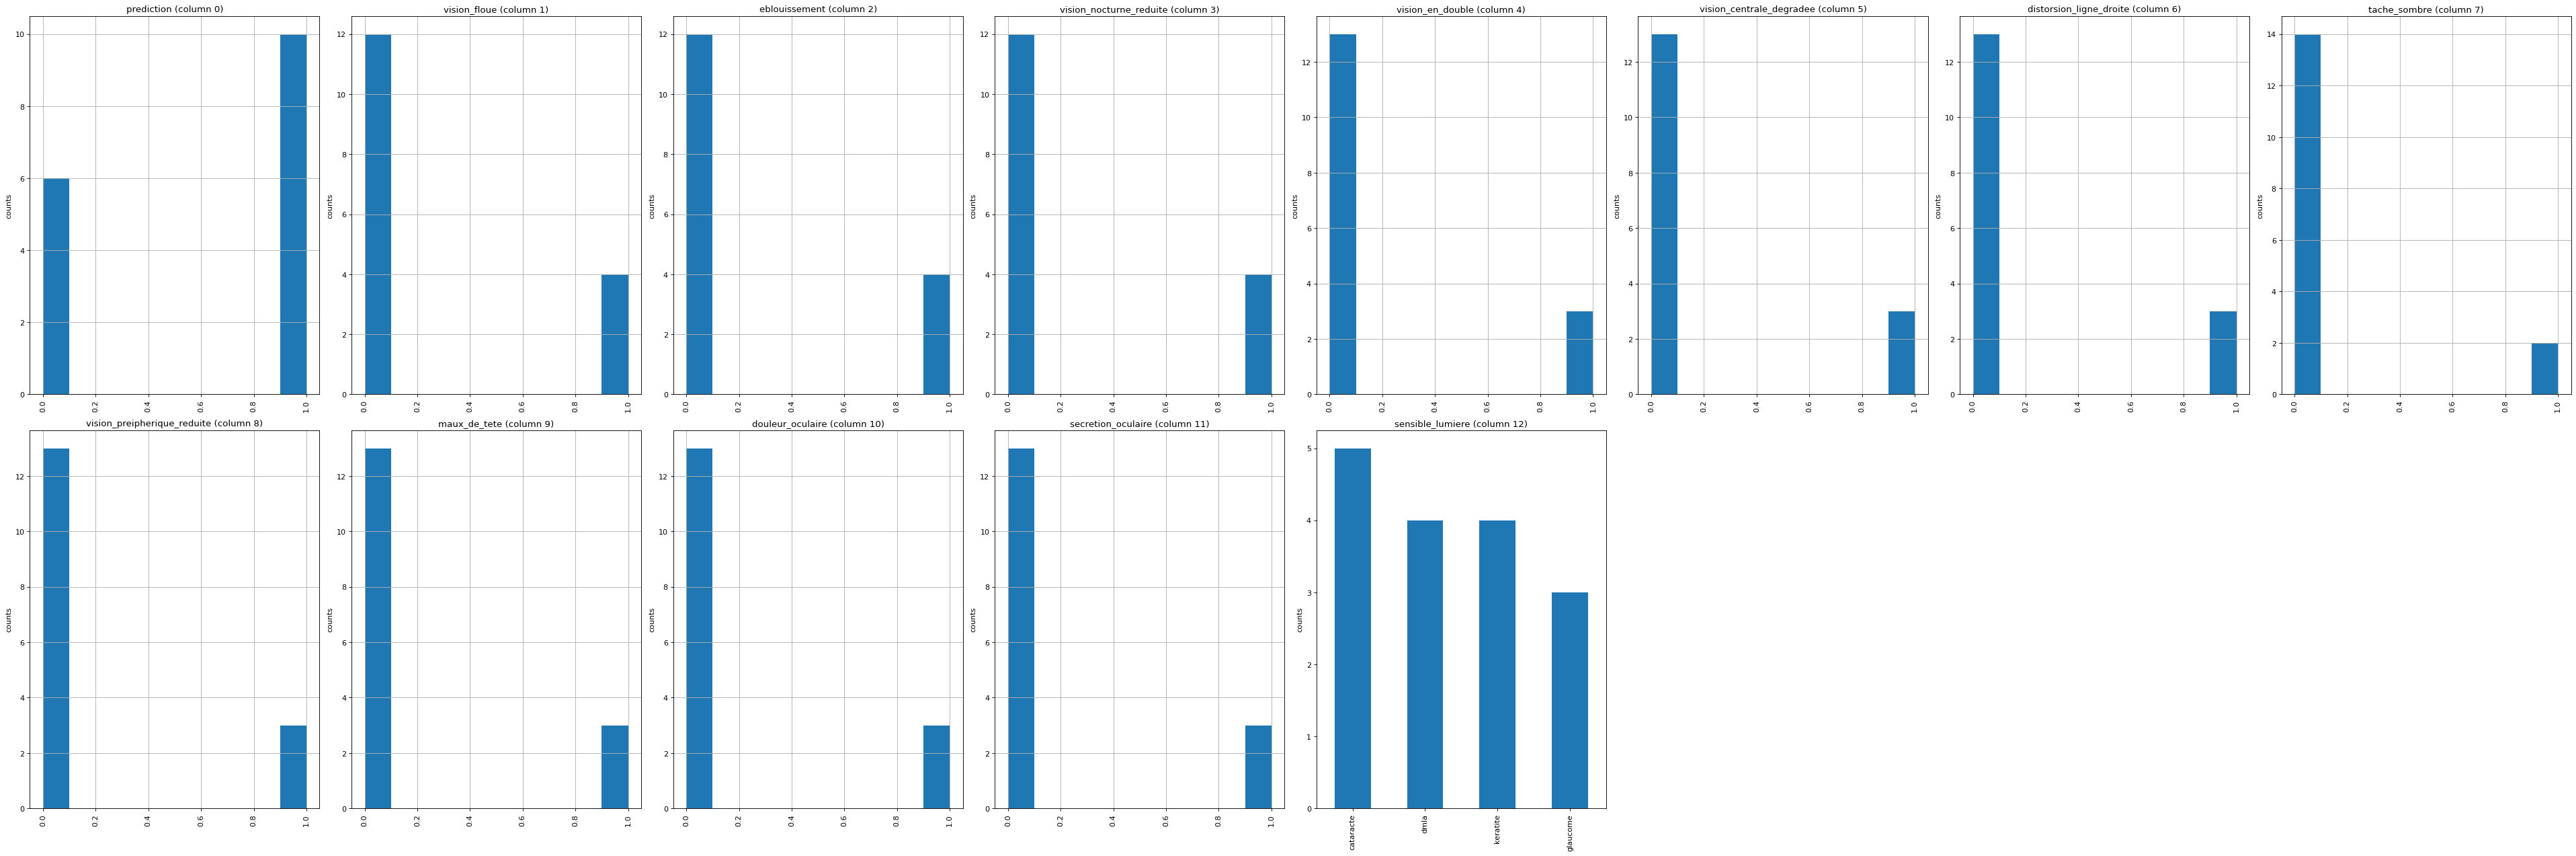

In [ ]:
plotPerColumnDistribution(df, 16, 8)

In [ ]:
plotScatterMatrix(df, 14, 7)

GRAPHE

In [ ]:
x = df[l1]
y = df[['prediction']]
np.ravel(y)
print(x)

IndentationError: ignored

RESULTAT

In [ ]:
#CONVERTIR LE FICHIER .CSV POUR UN ENCODAGE EN UTF8

import codecs

# Chemin du fichier CSV d'origine et du fichier de sortie UTF-8
chemin_entree2 = "/content/drive/MyDrive/Colab Notebooks/testing.csv"
chemin_sortie2 = "/content/drive/MyDrive/Colab Notebooks/testing_utf8.csv"

# Ouvrir le fichier d'entrée avec l'encodage d'origine
with codecs.open(chemin_entree2, 'r', encoding='ISO-8859-1') as file:
    contenu = file.read()

# Écrire le contenu dans un nouveau fichier avec l'encodage UTF-8
with codecs.open(chemin_sortie2, 'w', encoding='utf-8') as file:
    file.write(contenu)

In [ ]:
#IMPORTER ET LIRE LE FICHIER TESTING
tr = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/testing_utf8.csv")

#remplacer les valeurs
tr.replace({'prediction':{'Vision floue':0,'Éblouissement':1,'Vision nocturne réduite':2,'Vision en double':3,'Vision centrale dégradée':4,
                          'Distorsion des lignes droites':5,'Tâche sombre dans le champ visuel':6,'vision périphérique réduite':7,
                          'Maux de tête':8,'Douleur oculaire':9,'Sensibilité à la lumière':10,'Sécrétion oculaire':11}},inplace=True)
tr.head()

,prediction,vision_floue,eblouissement,vision_nocturne_reduite,vision_en_double,vision_centrale_degradee,distorsion_ligne_droite,tache_sombre,vision_preipherique_reduite,maux_de_tete,douleur_oculaire,secretion_oculaire,sensible_lumiere
0,1,1,1,1,0,0,0,0,0,0,0,0,cataracte
1,0,0,0,0,1,1,1,0,0,0,0,0,dmla
2,1,0,0,0,0,0,0,1,1,0,0,0,glaucome
3,1,0,0,0,0,0,0,0,0,1,1,1,keratite


on va creer l'algorithme DECISION TREE ALGORITHM

In [ ]:
#attribuer un nom de variable aux symptomes
def scatterplt(maladie):
	x=((DF.loc[maladie]).sum())    ###somme des symptomes de tout les maladies
	x.drop(x[x==0].index, inplace=True)   ###supprimer les symptomes dont la valeur est 0
	print(x.values)
	y=x.keys() #stocker les noms des symptomes dans y
	print(len(x))
	print(len(y))
	plt.title(maladie)
	plt.scatter(y,x.values)
	plt.show()

def scartterinp(symptome1,symptome2,symptome3,symptome4,symptome5):
	x=[symptome1,symptome2,symptome3,symptome4,symptome5]    ###stocker les symptomes entrés dans x
	y=[0,0,0,0,0]     ###creer et donner des valeur aux symptomes entrés

	if(symtome1 != 'selectionner symptome'):
		y[0]=1
	if(symtome2 != 'selectionner symptome'):
		y[1]=1
	if(symtome3 != 'selectionner symptome'):
		y[3]=1
	if(symtome4 != 'selectionner symptome'):
		y[3]=1
	if(symtome5 != 'selectionner symptome'):
		y[4]=1
	print(x)
	print(y)
	plt.scatter(x,y)
	plt.show()


In [ ]:
##on va utiliser tkinter pour creer un simple interface à notre projet
root = Tk()
prediction1=StringVar()
def DecisionTree():
	if len(NameEn.get()) == 0 :
		prediction1.set(" ")
		comp=messagebox.askokcancel("System", "veuillez entrer votre nom")
		if comp: root.mainloop()
	elif((sym1.get() == "selctionner symptome") or (sym2.get()== "selctionner symptome")):
		prediction1.set(" ")
		sym = messagebox.askokcancel("System", "veuillez entrer au moins 2 symptomes")
		if sym:  root.mainloop()
	else:
		from sklearn import tree

		clf3 = tree.DecisionTreeClassifier()
		clf3 = clf3.fit(X, y)

		from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
		y_pred = clf3.predict(X_test)
		print("decision tree")
		print("accuracy")
		print(accuracy_score(y_test, y_pred))
		print(accuracy_score(y_test, y_pred, normalize = false))
		print("confusion matrix")
		conf_matrix = confusion_matrix(y_test, y_pred)
		print(conf_matrix)

		psymtoms = [Symptom1.get(), Symptom2.get(), Symptom3.get(), Symptom4.get(), Symptom5.get()]
		for k in range(0, len(l1)):
			for z in psymtoms:
				if(z==l1[k]):
					l2[k]=1
		inputtest = [l2]
		predict = clf3.predict(inputtest)
		predicted=predict[0]

		h='non'
		for a in range(O, len(maladie)):
			if(predict==a):
				h='oui'
				break
		if(h=='oui'):
			pred1.set(" ")
			pred1.set(maladie[a])
		else:
			pred1.set(" ")
			pred1.set("on ne peut donner un diagnostic à votre maladie")

In [ ]:
##cREATION DE LA BASSE DE DONNEES
##UTILISATION DE SQLITE3
import sqlite3
conn=sqlite3.connect('database.db')
c= conn.cursor()
c.execute('CREATE TABLE IF NOT EXISTS Patient(idPatient StringVar PRIMARY KEY, Nom StringVar,Prenom StringVar, Age int)')
c.execute('CREATE TABLE IF NOT EXISTS Diagnostic(idDiagnostic StringVar PRIMARY KEY, idPatient StringVar, NomMaladie StringVar, Symptom StringVar, FOREIGN KEY(idPatient) REFERENCES Patient(idPatient))')
c.execute('INSERT INTO Patient(Nom,Prenom, Age) values (?,?,?)')
c.execute('INSERT INTO Diagnostic(idPatient, NomeMaladie, Symptom) values (?,?,?)')

conn.commit()
c.close()
conn.close()


#Symptom1 StringVar,Symptom2 StringVar,Symptom3 StringVar,Symptom4 StringVar,Symptom5 StringVar,maladie StringVar
#c.execute('INSERT INTO Patient(Nom, Symptom1,Symptom2,Symptom3,Symptom4,Symptom5, maladie) values (?,?,?,?,?,?,?)')

In [ ]:
#RANDOM FOREST ALGORITHM
pred2=StringVar()
def randomforest():
    if len(NameEn.get()) == 0:
        pred1.set(" ")
        comp=messagebox.askokcancel("System","veuillez entrer votre nom")
        if comp:
            root.mainloop()
    elif((Symptom1.get()=="selctionner symptome") or (Symptom2.get()=="selctionner symptome")):
        pred1.set(" ")
        sym=messagebox.askokcancel("System","veuillez entrer au moins 2 symptomes")
        if sym:
            root.mainloop()
    else:
        from sklearn.ensemble import RandomForestClassifier
        clf4 = RandomForestClassifier(n_estimators=100)
        clf4 = clf4.fit(X,np.ravel(y))

        # calculating accuracy
        from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
        y_pred=clf4.predict(X_test)
        print("Random Forest")
        print("Accuracy")
        print(accuracy_score(y_test, y_pred))
        print(accuracy_score(y_test, y_pred,normalize=False))
        print("Confusion matrix")
        conf_matrix=confusion_matrix(y_test,y_pred)
        print(conf_matrix)

        psymptoms = [Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get()]

        for k in range(0,len(l1)):
            for z in psymptoms:
                if(z==l1[k]):
                    l2[k]=1

        inputtest = [l2]
        predict = clf4.predict(inputtest)
        predicted=predict[0]

        h='non'
        for a in range(0,len(disease)):
            if(predicted == a):
                h='oui'
                break
        if (h=='oui'):
            pred2.set(" ")
            pred2.set(disease[a])
        else:
            pred2.set(" ")
            pred2.set("Not Found")